In [21]:
from kafka import KafkaConsumer
import pickle
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [22]:
consumer = KafkaConsumer(
    'ml-raw-dns',
    bootstrap_servers="localhost:9092",
    auto_offset_reset='earliest',
    enable_auto_commit=False
)

static_model = pickle.load(open('logistic.pkl', 'rb'))
dynamic_model = pickle.load(open('logistic.pkl', 'rb'))
myScaler = pickle.load(open('my_scaler.pkl', 'rb'))

type(consumer)

kafka.consumer.group.KafkaConsumer

In [23]:
i=0
counter = 0
X = []
y = []

static_scores = []
dynamic_scores = []

for m in consumer:
    if i==0:
        i+=1
        continue
        
    data = eval(m.value)
    data = data.split(',')
    counter = counter+1
    X.append(data[0:-1])
    y.append(data[-1][0])

    if counter == i*1000:
        i += 1
        X = pd.DataFrame(X, columns=['timestamp', 'FQDN_count', 'subdomain_length', 'upper', 'lower',\
                                     'numeric', 'entropy', 'special', 'labels', 'labels_max', \
                                     'labels_average', 'longest_word', 'sld', 'len', 'subdomain'])
        
        # dropping features based on selection done in the static model
        X.drop(['timestamp', 'upper', 'lower', 'entropy', 'labels_max'], axis=1, inplace=True)
    
        # convert feature values from string to int and hash the categorical features
        X['FQDN_count'] = X['FQDN_count'].astype('int')
        X['subdomain_length'] = X['subdomain_length'].astype('int')
        X['numeric'] = X['numeric'].astype('int')
        X['special'] = X['special'].astype('int')
        X['labels'] = X['labels'].astype('int')
        X['labels_average'] = X['labels_average'].astype('float')
        X['longest_word'] = X['longest_word'].apply(hash)
        X['sld'] = X['sld'].apply(hash)
        X['len'] = X['len'].astype('int')
        X['subdomain'] = X['subdomain'].astype('int')
    
        X = myScaler.transform(X)
    
        y = pd.DataFrame(y)
        y = y.astype('int')
    
        print(X.shape, y.shape)
        print(static_model.score(X, y))
    
        currentStaticScore = static_model.score(X, y)
        print('Static model score: ', currentStaticScore)
        static_scores.append(currentStaticScore)
    
        currentDynamicScore = dynamic_model.score(X, y)
        print('Dynamic model score: ', currentDynamicScore)
        dynamic_scores.append(currentDynamicScore)

        if currentDynamicScore < 0.65:
            print('re-training ...')
            dynamic_model.fit(X, y)
    
        X = []
        y = []
    
    if counter == 268064:
        break
    


(1000, 10) (1000, 1)
0.658
Static model score:  0.658
Dynamic model score:  0.658
(1000, 10) (1000, 1)
0.655
Static model score:  0.655
Dynamic model score:  0.655
(1000, 10) (1000, 1)
0.667
Static model score:  0.667
Dynamic model score:  0.667
(1000, 10) (1000, 1)
0.647
Static model score:  0.647
Dynamic model score:  0.647
re-training ...
(1000, 10) (1000, 1)
0.662
Static model score:  0.662
Dynamic model score:  0.792
(1000, 10) (1000, 1)
0.677
Static model score:  0.677
Dynamic model score:  0.802
(1000, 10) (1000, 1)
0.656
Static model score:  0.656
Dynamic model score:  0.796
(1000, 10) (1000, 1)
0.646
Static model score:  0.646
Dynamic model score:  0.801
(1000, 10) (1000, 1)
0.631
Static model score:  0.631
Dynamic model score:  0.803
(1000, 10) (1000, 1)
0.66
Static model score:  0.66
Dynamic model score:  0.82
(1000, 10) (1000, 1)
0.655
Static model score:  0.655
Dynamic model score:  0.807
(1000, 10) (1000, 1)
0.636
Static model score:  0.636
Dynamic model score:  0.815
(10

(1000, 10) (1000, 1)
0.653
Static model score:  0.653
Dynamic model score:  0.8
(1000, 10) (1000, 1)
0.667
Static model score:  0.667
Dynamic model score:  0.815
(1000, 10) (1000, 1)
0.632
Static model score:  0.632
Dynamic model score:  0.817
(1000, 10) (1000, 1)
0.657
Static model score:  0.657
Dynamic model score:  0.807
(1000, 10) (1000, 1)
0.653
Static model score:  0.653
Dynamic model score:  0.796
(1000, 10) (1000, 1)
0.651
Static model score:  0.651
Dynamic model score:  0.783
(1000, 10) (1000, 1)
0.664
Static model score:  0.664
Dynamic model score:  0.814
(1000, 10) (1000, 1)
0.664
Static model score:  0.664
Dynamic model score:  0.794
(1000, 10) (1000, 1)
0.672
Static model score:  0.672
Dynamic model score:  0.818
(1000, 10) (1000, 1)
0.672
Static model score:  0.672
Dynamic model score:  0.826
(1000, 10) (1000, 1)
0.651
Static model score:  0.651
Dynamic model score:  0.792
(1000, 10) (1000, 1)
0.684
Static model score:  0.684
Dynamic model score:  0.812
(1000, 10) (1000, 

(1000, 10) (1000, 1)
0.654
Static model score:  0.654
Dynamic model score:  0.807
(1000, 10) (1000, 1)
0.681
Static model score:  0.681
Dynamic model score:  0.821
(1000, 10) (1000, 1)
0.657
Static model score:  0.657
Dynamic model score:  0.821
(1000, 10) (1000, 1)
0.633
Static model score:  0.633
Dynamic model score:  0.81
(1000, 10) (1000, 1)
0.654
Static model score:  0.654
Dynamic model score:  0.805
(1000, 10) (1000, 1)
0.667
Static model score:  0.667
Dynamic model score:  0.813
(1000, 10) (1000, 1)
0.672
Static model score:  0.672
Dynamic model score:  0.816
(1000, 10) (1000, 1)
0.617
Static model score:  0.617
Dynamic model score:  0.789
(1000, 10) (1000, 1)
0.653
Static model score:  0.653
Dynamic model score:  0.8
(1000, 10) (1000, 1)
0.622
Static model score:  0.622
Dynamic model score:  0.773
(1000, 10) (1000, 1)
0.669
Static model score:  0.669
Dynamic model score:  0.798
(1000, 10) (1000, 1)
0.662
Static model score:  0.662
Dynamic model score:  0.824
(1000, 10) (1000, 1

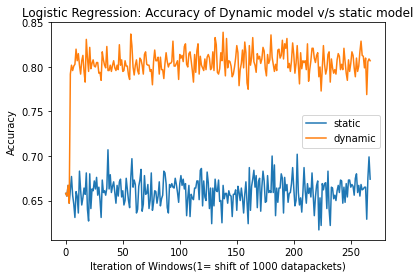

In [24]:
import matplotlib.pyplot as plt   

plt.plot(static_scores, label = 'static')
plt.plot(dynamic_scores, label = 'dynamic')
plt.xlabel("Iteration of Windows(1= shift of 1000 datapackets)")
plt.ylabel("Accuracy")
plt.title('Logistic Regression: Accuracy of Dynamic model v/s static model')
plt.legend()
plt.show()


In [25]:
pd.DataFrame({'average accuracy': [np.mean(static_scores)*100 , np.mean(dynamic_scores)*100], \
              'max accuracy': [max(static_scores)*100 , max(dynamic_scores)*100] }, \
             index =['Static Model','Dynamic Model'])

,average accuracy,max accuracy
Static Model,66.021269,70.7
Dynamic Model,80.307836,83.9
